In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
conv_base=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 2s 0us/step


In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [10]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir=r'D:\Cdeepmachine\train\cats_and_dogs'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=32

In [11]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(
    directory,
    target_size=(150,150),
    class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [13]:
from keras import models,layers,optimizers
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,
                  batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 834us/step - loss: 0.5915 - acc: 0.6885 - val_loss: 0.4359 - val_acc: 0.8440
Epoch 2/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.4209 - acc: 0.8055 - val_loss: 0.3710 - val_acc: 0.8420
Epoch 3/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.3568 - acc: 0.8460 - val_loss: 0.3254 - val_acc: 0.8670
Epoch 4/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.3038 - acc: 0.8795 - val_loss: 0.2997 - val_acc: 0.8880
Epoch 5/30
2000/2000 [==============================] - 1s 288us/step - loss: 0.2799 - acc: 0.8870 - val_loss: 0.2844 - val_acc: 0.8850
Epoch 6/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.2632 - acc: 0.8920 - val_loss: 0.2726 - val_acc: 0.8940
Epoch 7/30
2000/2000 [==============================] - 1s 289us/step - loss: 0.2481 - acc: 0.9010 - val_loss: 0.2697 - val_acc: 0.8900


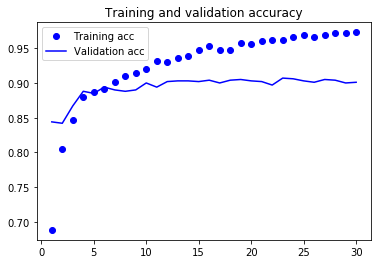

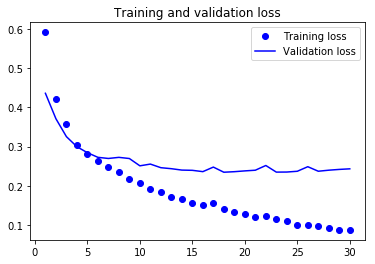

In [14]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_base.trainable=False

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=32,
                                                 class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=32,
                                                      class_mode='binary')
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 40s 396ms/step - loss: 0.5734 - acc: 0.7125 - val_loss: 0.4277 - val_acc: 0.8426
Epoch 2/30
100/100 [==============================] - 39s 387ms/step - loss: 0.4496 - acc: 0.8081 - val_loss: 0.3430 - val_acc: 0.8673
Epoch 3/30
100/100 [==============================] - 39s 392ms/step - loss: 0.4067 - acc: 0.8234 - val_loss: 0.3210 - val_acc: 0.8598
Epoch 4/30
100/100 [==============================] - 39s 392ms/step - loss: 0.3913 - acc: 0.8238 - val_loss: 0.2920 - val_acc: 0.8802
Epoch 5/30
100/100 [==============================] - 39s 394ms/step - loss: 0.3572 - acc: 0.8428 - val_loss: 0.2719 - val_acc: 0.8845
Epoch 6/30
100/100 [==============================] - 39s 393ms/step - loss: 0.3502 - acc: 0.8491 - val_loss: 0.2733 - val_acc: 0.8847
Epoch 7/30
100/100 [==============================] - 39s 394ms/step - loss: 0.3395 - acc: 0.8522 - val_lo

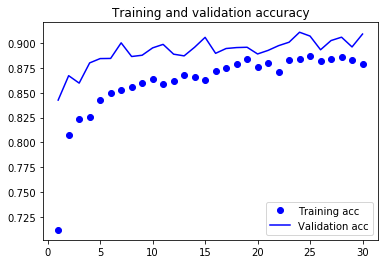

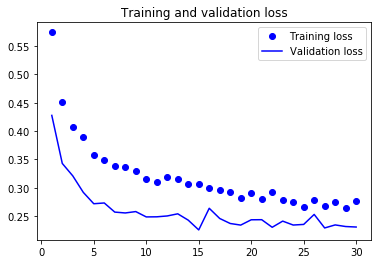

In [21]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=100,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/100
100/100 [==============================] - 47s 471ms/step - loss: 0.2771 - acc: 0.8753 - val_loss: 0.2189 - val_acc: 0.9086
Epoch 2/100
100/100 [==============================] - 45s 449ms/step - loss: 0.2286 - acc: 0.9034 - val_loss: 0.2271 - val_acc: 0.9162
Epoch 3/100
100/100 [==============================] - 45s 452ms/step - loss: 0.2053 - acc: 0.9159 - val_loss: 0.2206 - val_acc: 0.9194
Epoch 4/100
100/100 [==============================] - 45s 450ms/step - loss: 0.1882 - acc: 0.9234 - val_loss: 0.1971 - val_acc: 0.9272
Epoch 5/100
100/100 [==============================] - 45s 451ms/step - loss: 0.1848 - acc: 0.9234 - val_loss: 0.2850 - val_acc: 0.8982
Epoch 6/100
100/100 [==============================] - 45s 454ms/step - loss: 0.1693 - acc: 0.9303 - val_loss: 0.1997 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 46s 459ms/step - loss: 0.1551 - acc: 0.9350 - val_loss: 0.1857 - val_acc: 0.9246
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 45s 454ms/step - loss: 0.0190 - acc: 0.9937 - val_loss: 0.4113 - val_acc: 0.9156
Epoch 62/100
100/100 [==============================] - 45s 453ms/step - loss: 0.0190 - acc: 0.9931 - val_loss: 0.2683 - val_acc: 0.9369
Epoch 63/100
100/100 [==============================] - 46s 455ms/step - loss: 0.0212 - acc: 0.9928 - val_loss: 0.3076 - val_acc: 0.9315
Epoch 64/100
100/100 [==============================] - 45s 453ms/step - loss: 0.0281 - acc: 0.9875 - val_loss: 0.2169 - val_acc: 0.9401
Epoch 65/100
100/100 [==============================] - 46s 456ms/step - loss: 0.0169 - acc: 0.9937 - val_loss: 0.3128 - val_acc: 0.9340
Epoch 66/100
100/100 [==============================] - 45s 453ms/step - loss: 0.0200 - acc: 0.9934 - val_loss: 0.2387 - val_acc: 0.9439
Epoch 67/100
100/100 [==============================] - 45s 455ms/step - loss: 0.0204 - acc: 0.9937 - val_loss: 0.2417 - val_acc: 0.9397
Epoch 68/100
100/100 [===================

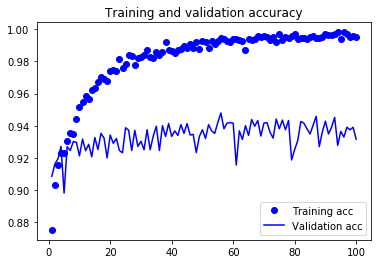

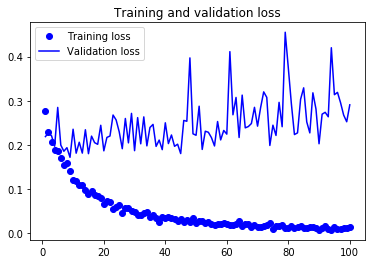

In [24]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

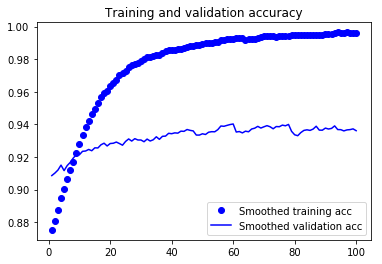

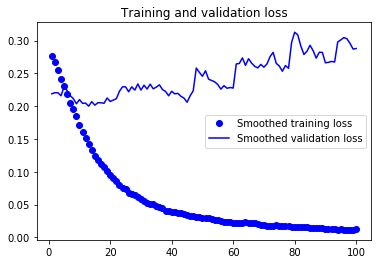

In [25]:
def smooth_curve(points,factor=0.8):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_curve(acc),'bo',label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc),'b',label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,smooth_curve(loss),'bo',label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss),'b',label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='binary')
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('test acc:',test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9428934010152284
